# Initialization

In [21]:
!pip install rocketcea==1.0.5

You should consider upgrading via the 'pip install --upgrade pip' command.


In [22]:
!pip install SciencePlots

You should consider upgrading via the 'pip install --upgrade pip' command.


In [23]:
# Noelle
from noelle import Motor, fluid
# RocketCEA
from rocketcea.cea_obj import CEA_Obj, add_new_fuel, add_new_oxidizer, add_new_propellant
from rocketcea.biprop_utils.rho_isp_plot_obj import RhoIspPlot
# CoolProp
from CoolProp.CoolProp import PhaseSI, PropsSI, get_global_param_string
import CoolProp.CoolProp as CoolProp
# Numpy
import numpy as np
# Matplotlib
from matplotlib import pyplot as plt
import matplotlib
import matplotlib as mpl
from labellines import labelLine, labelLines
plt.style.use('default')

In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
mpl.rcParams['figure.figsize'] = [12.0, 6.0]
mpl.rcParams['figure.dpi'] = 120
mpl.rcParams['savefig.dpi'] = 120

# mpl.rcParams['font.size'] = 12
# mpl.rcParams['legend.fontsize'] = 'small'
# mpl.rcParams['figure.titlesize'] = 'medium'

from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

In [26]:
%matplotlib notebook
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# Fuel and Oxidizer Cards

In [27]:
# Oxidizers
LOX = fluid(name='O2(L)', coolprop_name='oxygen', formula='O 2', fluid_type='oxidizer', storage_pressure=35e5, storage_temperature=90.17)
GOX = fluid(name='O2(G)', coolprop_name='oxygen', formula='O 2', fluid_type='oxidizer', storage_pressure=35e5, storage_temperature=298.15)
NOX =  fluid(name='N2O', coolprop_name='NitrousOxide', formula=None, fluid_type='oxidizer', storage_temperature=298.15)

oxidizers_list = [GOX, LOX, NOX]

# Fuels
LCH4 = fluid(name='CH4(L)', coolprop_name='methane', formula='C 1 H 4', fluid_type='fuel', storage_pressure=1e5)
GCH4 = fluid(name='CH4(G)', coolprop_name='methane', formula='C 1 H 4', fluid_type='fuel', storage_pressure=35e5, storage_temperature=298.15)
LC2H5OH = fluid(name='C2H5OH(L)', coolprop_name='ethanol', formula='C 2 H 6 O 1', fluid_type='fuel', storage_pressure=35e5, storage_temperature=298.15)
JetA = fluid(name='JetA', coolprop_name=None, formula=None, fluid_type='fuel', storage_pressure=35e5, storage_temperature=298.15, storage_density=815, storage_enthalpy=72466.6)

fuels_list = [LCH4, GCH4, LC2H5OH, JetA]

# Preliminary Design

In [37]:
NOELLE = Motor(
    NOX,
    LC2H5OH,
    thrust = 1500,
    burn_time = 10,
    p_chamber = 35,
    n_cstar = 1,
    n_cf = 1,
    cd_ox = 0.6,
    cd_fuel = 0.182,
    suboptimal = 1
)
NOELLE.report()

Thrust (N): 1500.00

Burn time (seconds): 10.00

Chamber pressure (bar): 35.0

Adiabatic chamber temperature (Kelvin): 3187.5

Molecular Weight of exhaust products (kg/kmol): 26.32

Ratio of specific heats of exhaust products: 1.14

Oxidiser/fuel mass ratio: 5.40

Combustion efficiency (%): 1.00

Thrust coefficient efficiency (%): 1.00

Pressure on oxidiser tank (bar): 56.52

Temperature on oxidiser tank (K): 298.15

Pressure on fuel tank (bar): 35.00

Temperature on fuel tank (K): 298.15

Characteristic velocity (m/s): 1574.63

Thrust coefficient: 1.52

Specific impulse (seconds): 244.67

Volumetric Specific impulse (Ns/m³): 1799345.75

Total mass flow rate (kg/s): 0.625

Oxidiser mass flow rate (kg/s): 0.527

Fuel mass flow rate (kg/s): 0.098

Total oxidiser mass (kg): 5.273

Total fuel mass (kg): 0.976

Nozzle throat diameter (mm): 18.9

Nozzle exit diameter (mm): 46.0



In [38]:
244.67*9.8

2397.766

# Fuel and Oxidizers Comparison

Fuel List:
    - CH4 (L) - LNG
    - CH4 (G) - NG
    - C2H6O (L) - Ethanol
    - C12H23 (L) - JetA - Kerosene
    
Oxidizer List:
    - O2 (L)
    - O2 (G)
    - NO2 (L-G)

## Oxidizer Fuel Combinations

In [18]:
# Combinations
import itertools
oxidizer_fuel_combinations = list(itertools.product(oxidizers_list, fuels_list))

print("Number of combinations:", len(oxidizer_fuel_combinations))
for combination in oxidizer_fuel_combinations:
    print("-----------"+str(combination)+"-----------")
    test_motor = Motor(combination[0],
                    combination[1],
                    thrust = 1000,
                    burn_time = 10,
                    p_chamber = 35,
                    n_cstar = 0.885,
                    n_cf = 0.95,
                    cd_ox = 0.4,
                    cd_fuel = 0.4)
    test_motor.report()

Number of combinations: 12
-----------(O2(G), CH4(L))-----------
Ox name changed to GO2
Thrust (N): 1000.00

Burn time (seconds): 10.00

Chamber pressure (bar): 35.0

Adiabatic chamber temperature (Kelvin): 3460.0

Molecular Weight of exhaust products (kg/kmol): 20.46

Ratio of specific heats of exhaust products: 1.13

Oxidiser/fuel mass ratio: 3.10

Combustion efficiency (%): 0.89

Thrust coefficient efficiency (%): 0.95

Pressure on oxidiser tank (bar): 35.00

Temperature on oxidiser tank (K): 298.15

Pressure on fuel tank (bar): 1.00

Temperature on fuel tank (K): 111.51

Characteristic velocity (m/s): 1867.34

Thrust coefficient: 1.53

Specific impulse (seconds): 244.78

Volumetric Specific impulse (Ns/m³): 141552.61

Total mass flow rate (kg/s): 0.416

Oxidiser mass flow rate (kg/s): 0.315

Fuel mass flow rate (kg/s): 0.102

Total oxidiser mass (kg): 3.149

Total fuel mass (kg): 1.016

Nozzle throat diameter (mm): 15.8

Nozzle exit diameter (mm): 38.8

-----------(O2(G), CH4(G))--

Thrust (N): 1000.00

Burn time (seconds): 10.00

Chamber pressure (bar): 35.0

Adiabatic chamber temperature (Kelvin): 3277.1

Molecular Weight of exhaust products (kg/kmol): 25.27

Ratio of specific heats of exhaust products: 1.15

Oxidiser/fuel mass ratio: 10.00

Combustion efficiency (%): 0.89

Thrust coefficient efficiency (%): 0.95

Pressure on oxidiser tank (bar): 56.52

Temperature on oxidiser tank (K): 298.15

Pressure on fuel tank (bar): 35.00

Temperature on fuel tank (K): 298.15

Characteristic velocity (m/s): 1627.69

Thrust coefficient: 1.52

Specific impulse (seconds): 212.40

Volumetric Specific impulse (Ns/m³): 416643.76

Total mass flow rate (kg/s): 0.480

Oxidiser mass flow rate (kg/s): 0.436

Fuel mass flow rate (kg/s): 0.044

Total oxidiser mass (kg): 4.363

Total fuel mass (kg): 0.436

Nozzle throat diameter (mm): 15.9

Nozzle exit diameter (mm): 38.4

-----------(N2O, C2H5OH(L))-----------
Thrust (N): 1000.00

Burn time (seconds): 10.00

Chamber pressure (bar): 35

In [10]:
# Combinations
import itertools
oxidizer_fuel_combinations = list(itertools.product(oxidizers_list, fuels_list))

for combination in oxidizer_fuel_combinations:
    # Extract fuel and oxidizer
    oxidizer = combination[0]
    fuel = combination[1]
    # Create test motor
    test_motor = Motor(oxidizer,
                        fuel,
                        thrust = 1000,
                        burn_time = 10,
                        p_chamber = 35,
                        n_cstar = 0.885,
                        n_cf = 0.95,
                        cd_ox = 0.4,
                        cd_fuel = 0.4)
    print("Test Motor - Oxidizer: *"+str(oxidizer)+"* | Fuel: *"+str(fuel)+"* | Isp: *{:0.1f}* s | Iv: *{:0.1f}* 10^3 Ns/m³ | c*: {:0.1f} m/s".format(test_motor.Isp, test_motor.Iv/100, test_motor.cstar))
    

Ox name changed to GO2
Test Motor - Oxidizer: *O2(G)* | Fuel: *CH4(L)* | Isp: *244.8* s | Iv: *1415.5* 10^3 Ns/m³ | c*: 1867.3 m/s
Ox name changed to GO2
Fuel name changed to GCH4
Test Motor - Oxidizer: *O2(G)* | Fuel: *CH4(G)* | Isp: *247.3* s | Iv: *910.6* 10^3 Ns/m³ | c*: 1887.9 m/s
Ox name changed to GO2
Test Motor - Oxidizer: *O2(G)* | Fuel: *C2H5OH(L)* | Isp: *228.1* s | Iv: *1585.2* 10^3 Ns/m³ | c*: 1737.1 m/s
Ox name changed to GO2
Test Motor - Oxidizer: *O2(G)* | Fuel: *JetA* | Isp: *235.7* s | Iv: *1460.6* 10^3 Ns/m³ | c*: 1800.0 m/s
Test Motor - Oxidizer: *N2O* | Fuel: *CH4(L)* | Isp: *211.5* s | Iv: *14422.4* 10^3 Ns/m³ | c*: 1621.0 m/s
Fuel name changed to GCH4
Test Motor - Oxidizer: *N2O* | Fuel: *CH4(G)* | Isp: *212.4* s | Iv: *4166.4* 10^3 Ns/m³ | c*: 1627.7 m/s
Test Motor - Oxidizer: *N2O* | Fuel: *C2H5OH(L)* | Isp: *205.7* s | Iv: *15128.0* 10^3 Ns/m³ | c*: 1574.6 m/s
Test Motor - Oxidizer: *N2O* | Fuel: *JetA* | Isp: *208.4* s | Iv: *15334.7* 10^3 Ns/m³ | c*: 1597.2 

## $I_{sp}$ and $\rho \cdot I_{sp}$ Comparison

In [9]:
# Combinations
import itertools
oxidizer_fuel_combinations = list(itertools.product(oxidizers_list, fuels_list))

results_x = []
results_y = []

for combination in oxidizer_fuel_combinations:
    sub_result_x = []
    sub_result_y = []
    # Extract fuel and oxidizer
    oxidizer = combination[0]
    fuel = combination[1]
    for suboptimal in np.linspace(0.7, 1.3, 20):
        # Create test motor
        test_motor = Motor(oxidizer,
                            fuel,
                            thrust = 1000,
                            burn_time = 10,
                            p_chamber = 35,
                            n_cstar = 0.885,
                            n_cf = 0.95,
                            cd_ox = 0.4,
                            cd_fuel = 0.4,
                            suboptimal = suboptimal)
        sub_result_x.append(test_motor.propellant_storage_density)
        sub_result_y.append(test_motor.Isp)
    
    results_x.append(sub_result_x) 
    results_y.append(sub_result_y)
   
    print("Test Motor - Oxidizer: *"+str(oxidizer)+"* | Fuel: *"+str(fuel)+"* | Isp: *{:0.1f}* s | Iv: *{:0.1f}* 10^3 Ns/m³".format(test_motor.Isp, test_motor.Iv/100))

Ox name changed to GO2
Ox name changed to GO2
Ox name changed to GO2
Ox name changed to GO2
Ox name changed to GO2
Ox name changed to GO2
Ox name changed to GO2
Ox name changed to GO2
Ox name changed to GO2
Ox name changed to GO2
Ox name changed to GO2
Ox name changed to GO2
Ox name changed to GO2
Ox name changed to GO2
Ox name changed to GO2
Ox name changed to GO2
Ox name changed to GO2
Ox name changed to GO2
Ox name changed to GO2
Ox name changed to GO2
Test Motor - Oxidizer: *O2(G)* | Fuel: *CH4(L)* | Isp: *234.9* s | Iv: *1292.0* 10^3 Ns/m³
Ox name changed to GO2
Fuel name changed to GCH4
Ox name changed to GO2
Fuel name changed to GCH4
Ox name changed to GO2
Fuel name changed to GCH4
Ox name changed to GO2
Fuel name changed to GCH4
Ox name changed to GO2
Fuel name changed to GCH4
Ox name changed to GO2
Fuel name changed to GCH4
Ox name changed to GO2
Fuel name changed to GCH4
Ox name changed to GO2
Fuel name changed to GCH4
Ox name changed to GO2
Fuel name changed to GCH4
Ox name 

<IPython.core.display.Javascript object>


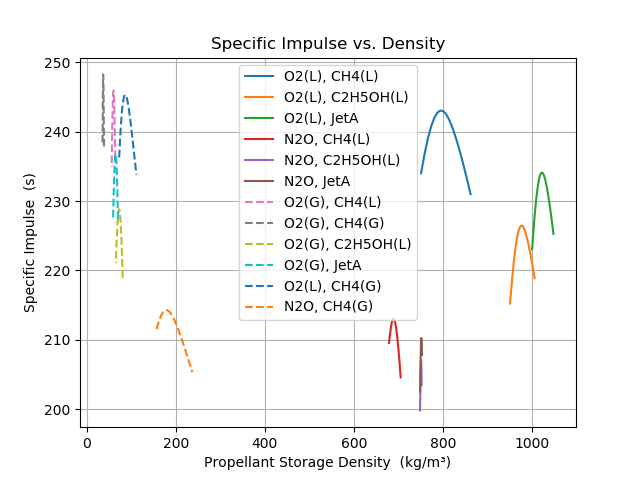

In [27]:
plt.figure()
x_mesh = np.linspace(1, 1200, 1200)
# for i in range(40, 260, 20):
#     plt.plot(x_mesh, 1000*i/x_mesh, color='grey', linestyle='--', label=str(i))
# labelLines(plt.gca().get_lines(),zorder=2.5)

a5, = plt.plot(results_x[4], results_y[4], label=str(oxidizer_fuel_combinations[4])[1:-1])
a1, = plt.plot(results_x[6], results_y[6], label=str(oxidizer_fuel_combinations[6])[1:-1])
a2, = plt.plot(results_x[7], results_y[7], label=str(oxidizer_fuel_combinations[7])[1:-1])
a3, = plt.plot(results_x[8], results_y[8], label=str(oxidizer_fuel_combinations[8])[1:-1])
a5, = plt.plot(results_x[10], results_y[10], label=str(oxidizer_fuel_combinations[10])[1:-1])
a6, = plt.plot(results_x[11], results_y[11], label=str(oxidizer_fuel_combinations[11])[1:-1])
a1, = plt.plot(results_x[0], results_y[0], '--', label=str(oxidizer_fuel_combinations[0])[1:-1])
a2, = plt.plot(results_x[1], results_y[1], '--', label=str(oxidizer_fuel_combinations[1])[1:-1])
a3, = plt.plot(results_x[2], results_y[2], '--', label=str(oxidizer_fuel_combinations[2])[1:-1])
a4, = plt.plot(results_x[3], results_y[3], '--', label=str(oxidizer_fuel_combinations[3])[1:-1])
a6, = plt.plot(results_x[5], results_y[5], '--', label=str(oxidizer_fuel_combinations[5])[1:-1])
a4, = plt.plot(results_x[9], results_y[9], '--', label=str(oxidizer_fuel_combinations[9])[1:-1])

    
# plt.xlim(650, 1100)
# plt.ylim(190, 250)
plt.xlabel('Propellant Storage Density  (kg/m³)')
plt.ylabel('Specific Impulse  (s)')
plt.title('Specific Impulse vs. Density')
plt.legend()
plt.grid()
plt.show()
plt.savefig("output.png", bbox_inches="tight")


In [20]:
np.savetxt('I_sp_x.csv', results_x, delimiter=',')
np.savetxt('I_sp_y.csv', results_y, delimiter=',')

In [14]:
%matplotlib notebook

In [13]:
rp = RhoIspPlot(dpi=120, bipropL=oxidizer_fuel_combinations, Pc=500, eps=2.4)
rp.add_rho_isp_contours(label_frac_pos=0.4)
rp.show()

Exception: O2(G) Specific Gravity Missing...
   add to spec_gravD["O2(G)"]

<Figure size 1200x960 with 0 Axes>

Thrust (N):  1000

Burn time (seconds):  10

Chamber pressure (bar):  35.0

Adiabatic chamber temperature (Kelvin):  3459

Molecular Weight of exhaust products (kg/kmol):  21.479

Ratio of specific heats of exhaust products:  1.1275

Oxidiser/fuel mass ratio:  3.4

Combustion efficiency (%):  0.885

Thrust coefficient efficiency (%):  0.95

Pressure on oxidiser tank (bar):  60.0

Pressure on fuel tank (bar):  60.0

Characteristic velocity (m/s):  1824.9090670998671

Thrust coefficient:  1.5319423642464303

Specific impulse (seconds):  239.59708162026234

Total mass flow rate (kg/s):  0.42545092158536946

Oxidiser mass flow rate (kg/s):  0.3287575303159673

Fuel mass flow rate (kg/s):  0.09669339126940214

Total oxidiser mass (kg):  3.287575303159673

Total fuel mass (kg):  0.9669339126940214

Nozzle throat diameter (mm):  15.8102239371169

Nozzle exit diameter (mm):  38.962301101776795

Thrust (N):  1000

Burn time (seconds):  10

Chamber pressure (bar):  35.0

Adiabatic chamber temper

Thrust (N):  1000

Burn time (seconds):  10

Chamber pressure (bar):  35.0

Adiabatic chamber temperature (Kelvin):  3374.954420422857

Molecular Weight of exhaust products (kg/kmol):  23.13689739766331

Ratio of specific heats of exhaust products:  1.1270042250224828

Oxidiser/fuel mass ratio:  1.7000000000000002

Combustion efficiency (%):  0.885

Thrust coefficient efficiency (%):  0.95

Pressure on oxidiser tank (bar):  35.0

Temperature on oxidiser tank (K):  298.15

Pressure on fuel tank (bar):  35.0

Temperature on fuel tank (K):  298.15

Characteristic velocity (m/s):  1737.09692518622

Thrust coefficient:  1.5321907092800047

Specific impulse (seconds):  228.10496835212393

Volumetric Specific impulse (Ns/m³):  158523.08074496416

Total mass flow rate (kg/s):  0.4468854839985183

Oxidiser mass flow rate (kg/s):  0.28137234177684484

Fuel mass flow rate (kg/s):  0.16551314222167343

Total oxidiser mass (kg):  2.8137234177684483

Total fuel mass (kg):  1.6551314222167344

Nozzle

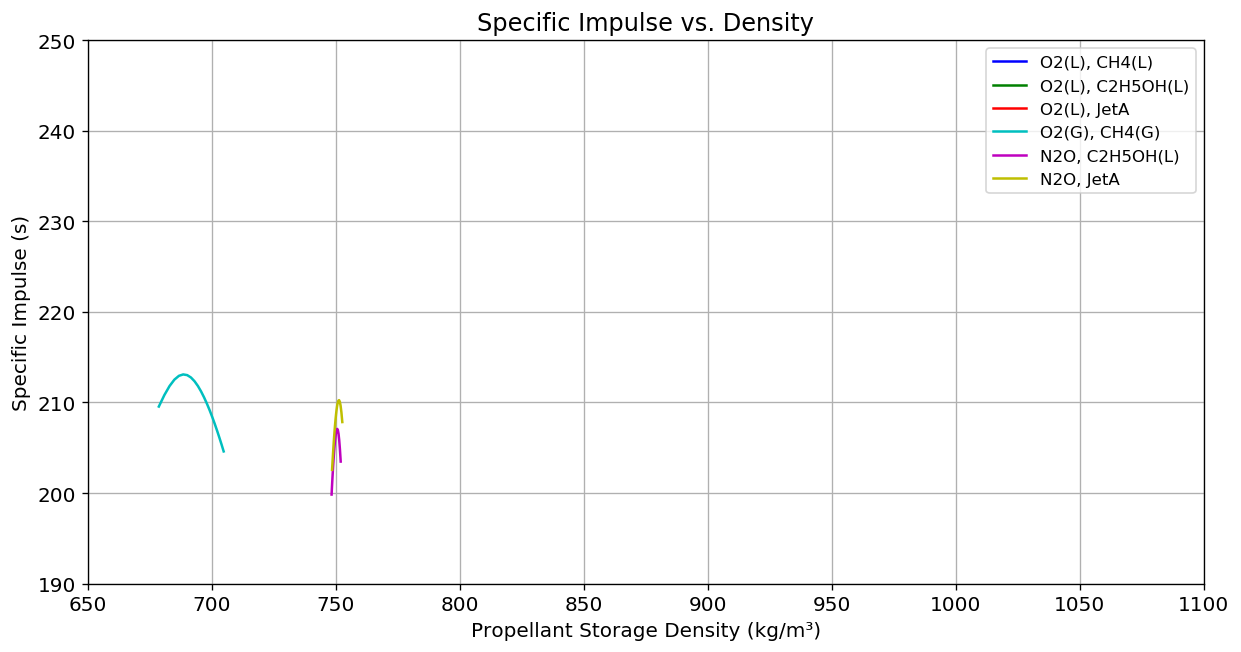

Exception: O2(L) Specific Gravity Missing...
   add to spec_gravD["O2(L)"]

<Figure size 1200x960 with 0 Axes>

In [59]:
from preliminar import Motor
# RocketCEA
from rocketcea.cea_obj import CEA_Obj, add_new_fuel, add_new_oxidizer, add_new_propellant
from rocketcea.biprop_utils.rho_isp_plot_obj import RhoIspPlot
# CoolProp
from CoolProp.CoolProp import PhaseSI, PropsSI, get_global_param_string
import CoolProp.CoolProp as CoolProp
# Numpy
import numpy as np
# Matplotlib
from matplotlib import pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [12.0, 6.0]
mpl.rcParams['figure.dpi'] = 120
mpl.rcParams['savefig.dpi'] = 120

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'small'
mpl.rcParams['figure.titlesize'] = 'medium'

from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

class fluid:
    def __init__(self,
                 name,
                 coolprop_name,
                 formula,
                 fluid_type, 
                 storage_pressure=None, 
                 storage_temperature=None,
                 storage_density=None,
                 storage_enthalpy=None):
        """Class to hold and calculate thermodynamic properties of
        oxidizers and fuels. When a new object is created, a new
        card is also created to be used in rocketcea.
        
        Parameters
        ----------
        name: string
            Name used to specify the fluid in rocketcea.
        coolprop_name: string
            Name used to get thermodynamic data from coolprop
        formula: string
            Chemical formula used to specify fluid in rocketcea,
            if data from thermo.lib is desired. Example: formula
            for CH4 would be: 'C 1 H 4'. If none, no cea card
            will be created.
        fluid_type: string
            Either 'oxidizer' or 'fuel'.
        storage_pressure: float
            Storage pressure in Pa. If not give, it will automatically
            be calculated considering saturation conditions (phase change),
            using coolprop. Either storage_temperature or presure must be given!
        storage_temperature: float, optional
            Storage temperature in K. If not given, it will automatically
            be calculated considering saturation conditions (phase change),
            using coolprop. Either storage_temperature or presure must be given!
        storage_density: float, optional
            Storage density in kg/m³. If not given, it will automatically
            be calculated based on pressure and temperature given. If the
            fluid is in phase change regime, liquid density will be considered.
        storage_enthalpy: float, optional
            Storage enthalpy in J/kg. If not given, it will be calculated using coolprop
            based on pressure and temperature given, considering liquid properties
            if state is phase change. Coolprop and NASA CEA use different enthalpy
            references. Therefore, this entalhpy will not be used in the input card
            for rocketcea. Thermo.lib will be used to calculate the entalphy based on
            the fluid formula.
        """
        
        # Save input data
        self.name = name
        self.coolprop_name = coolprop_name
        self.formula = formula
        self.fluid_type = fluid_type
        self.storage_pressure = storage_pressure
        self.storage_temperature = storage_temperature
        self.storage_density = storage_density
        self.storage_enthalpy = storage_enthalpy
        self.quality = None
        
        # Calculate relevant thermodynamic properties
        if self.storage_pressure is None:
            self.quality = 0 # Consider only liquid phase
            self.calc_pressure()        
        elif self.storage_temperature is None:
            self.quality = 0 # Consider only liquid phase
            self.calc_temperature()
        
        if self.storage_density is None:
            self.calc_density()
        
        if self.storage_enthalpy is None:
            self.calc_enthalpy()
        
        # Create CEA card
        self.card = ""
        if self.formula != None:
            self.cea_card()
    
    def calc_pressure(self):
        # Calculate pressure based on saturation curve
        P = PropsSI("P",
                    "Q", 0,
                    "T", self.storage_temperature,
                    self.coolprop_name)
        self.storage_pressure = P
        return P
    
    def calc_temperature(self):
        # Calculate temperature based on saturation curve
        T = PropsSI("T",
                    "Q", 0,
                    "P", self.storage_pressure,
                    self.coolprop_name)
        self.storage_temperature = T
        if self.name == 'O2(L)':
            self.storage_temperature = 90
        return T
    
    def calc_density(self):
        # Calculate density using CoolProp
        if self.quality == 0:
            D = PropsSI("D",
                        "Q", 0,
                        "P", self.storage_pressure,
                        self.coolprop_name)
        else:
            D = PropsSI("D",
                        "T", self.storage_temperature,
                        "P", self.storage_pressure,
                        self.coolprop_name)
        # Save result
        self.storage_density = D
        return D
    
    def calc_enthalpy(self):
        # Calculate density using CoolProp
        if self.quality == 0:
            H = PropsSI("H",
                        "Q", 0,
                        "P", self.storage_pressure,
                        self.coolprop_name)
        else:            
            H = PropsSI("H",
                        "T", self.storage_temperature,
                        "P", self.storage_pressure,
                        self.coolprop_name)
        # Save result
        self.storage_enthalpy = H
        return H
    
    def cea_card(self):
        # Create cea card and rocketcea fuel/oxidizer
        self.card += self.name + " "
        self.card += self.formula + " "
        self.card += "wt%=100" + " "
        # self.card += "h,cal={:.3f}".format(self.storage_enthalpy/4.184) + " "
        self.card += "t(k)={:.3f}".format(self.storage_temperature) + " "
        self.card += "rho={:.3f}".format(self.storage_density/1000) + " " # convert density to g/cc
        if self.fluid_type == "oxidizer":
            self.card = "oxid " + self.card
            add_new_oxidizer(self.name, self.card)
        elif self.fluid_type == "fuel":
            self.card = "fuel " + self.card
            add_new_fuel(self.name, self.card)
        return self.card 
    
    def __repr__(self):
        return self.name

# Oxidizers
LOX = fluid(name='O2(L)', coolprop_name='oxygen', formula='O 2', fluid_type='oxidizer', storage_pressure=50e5)
GOX = fluid(name='O2(G)', coolprop_name='oxygen', formula='O 2', fluid_type='oxidizer', storage_pressure=35e5, storage_temperature=298.15)
NOX =  fluid(name='N2O', coolprop_name='NitrousOxide', formula=None, fluid_type='oxidizer', storage_temperature=298.15)

oxidizers_list = [LOX, GOX, NOX]

# Fuels
LCH4 = fluid(name='CH4(L)', coolprop_name='methane', formula='C 1 H 4', fluid_type='fuel', storage_pressure=1e5)
GCH4 = fluid(name='CH4(G)', coolprop_name='methane', formula='C 1 H 4', fluid_type='fuel', storage_pressure=35e5, storage_temperature=298.15)
LC2H5OH = fluid(name='C2H5OH(L)', coolprop_name='ethanol', formula='C 2 H 6 O 1', fluid_type='fuel', storage_pressure=35e5, storage_temperature=298.15)
JetA = fluid(name='JetA', coolprop_name=None, formula=None, fluid_type='fuel', storage_pressure=35e5, storage_temperature=298.15, storage_density=815, storage_enthalpy=72466.6)

fuels_list = [LCH4, GCH4, LC2H5OH, JetA]

LCH4.storage_temperature

# # Oxidizers
# ## O2 (L) - LOX - Already specified in RocketCEA
# LOX_card = """
# oxid O2(L)  O 2
# h,cal=-3102.      t(k)=90.18       wt%=100.
# """

# ## O2 (G) - GOX - Already Specified in RocketCEA
# GOX_card = """
# oxid O2(G)  O 2
# h,cal=0.      t(k)=298.15       wt%=100.
# """

# ## N2O (G+L) - N2O - Already Specified in RocketCEA
# NOX_card = """
# oxid NitrousOxide  N 2.0 O 1.0  wt%=100.00
# h,cal= 19467.0 t(k)=298.15
# """

# # Fuels
# ## CH4 (L) - CH4 - Already Specified in RocketCEA
# LCH4_card = """
# fuel CH4(L) C 1 H 4     wt%=100.
# h,cal=-21390.     t(k)=111.66   rho=0.4239
# """

# ## CH4 (G) - GCH4 - Already Specified in RocketCEA
# GCH4_card = """
# fuel CH4(G) C 1 H 4
# h,cal=-17895.0      t(k)=298.15       wt%=100.
# """

# ## C2H5OH (L) - Ethanol - Already Specified in RocketCEA
# GCH4_card = """
# fuel C2H5OH(L)   C 2 H 6 O 1
# h,cal=-66370.0      t(k)=298.15       wt%=100.
# """

# ## C12H23 - JetA (L) - Aviation Kerosene- Already Specified in RocketCEA
# GCH4_card = """
# fuel Jet-A(L)  C  12.0 H  23.0
# h,cal=-72466.6     t(k)=298.15   rho=0.815
# """

LMS_I = Motor()
LMS_I.report()

class Motor2:
        def __init__ (self,
                      oxidizer,
                      fuel,
                      thrust = 1000,
                      burn_time = 10,
                      p_chamber = 35,
                      n_cstar = 0.885,
                      n_cf = 0.95,
                      cd_ox = 0.4,
                      cd_fuel = 0.4,
                      suboptimal=1):
            
            """
            Motor preliminary design class.
            This code computes some key design parameters of a LOX-CH4 liquid rocket engine, namely:

            - Oxidiser mass flow rate (kg/s)
            - Fuel mass flow rate (kg/s)
            - Oxidiser total mass (kg)
            - Fuel total mass (kg)
            - Nozzle throat and exit areas (m2)
            - Number injector orifices
            - Volume of combustion chamber (m3)

            Provided that the following inputs are given:

            - Nominal Thrust (N)
            - Burn time (s)
            - Combustion chamber pressure (Pascal)
            - Oxidiser tank pressure (Pascal)
            - Fuel tank pressure (Pascal)
            - Heat capacity ratio of combustion products
            - Molar weight of combustion products (kg/kmol)
            - Adiabatic flame temperature (K)
            - Oxidiser-fuel mass ratio
            - Discharge coefficient of injector's orifices
            - Diameter of injector's orifices (m)
            - Combustion efficiency
            - Nozzle expansion efficiency

            Assumptions:

            - Isentropic flow along the nozzle

            - Temperature inside the combustion chamber equals the adiabatic flame temperature

            - Combustion chamber is adiabatic

            - Combustion products form a mixture which behaves like an ideal gas
            
            Parameters
            ----------
            oxidizer: Fluid object
                Object from Fluid class with oxidizer properties.
                Example: LOX_PC = fluid(name='O2(L)', coolprop_name='oxygen', 
                                       formula='O 2', fluid_type='oxidizer',
                                       storage_temperature=90)
            fuel: Fluid object
                Object from Fluid class with fuel properties.
                Example: LCH4_PC = fluid(name='CH4(L)', coolprop_name='methane',
                                         formula='C 1 H 4', fluid_type='fuel',
                                         storage_temperature=112)
            thrust: float
                Nominal desired thrust (N).
            burn_time: float
                Nominal desired motor burn time (s).
            p_chamber: float
                Chamber pressure (bar).
            n_cstar: float
                Combustion efficiency. Ranges from 0 to 1 (1 is better).
            n_cf: float
                Thrust coefficient efficiency. Ranges from 0 to 1 (1 is better).
            cd_ox: float
                Discharge coefficient on oxidiser injector. (No units)
            cd_fuel: float
                Discharge coefficient on fuel injector. (No units)
            
            Calculated Parameters
            ---------------------
            self.To: float
                Adiabatic flame temperature (K).
            self.OFratio: float
                Oxidiser to fuel mass ratio for optimal Isp.
            self.k: float
                Ratio of specific heats of exhaust products in case 
                of optimal Isp.
            self.Mol_Weight: float
                Molecular weight of exhaust products (kg/kmol) in case
                of optimal Isp.            
            """
            
    
            #---------------Inputs----------------#
            # Environment
            self.g = 9.81    # Gravitational Acceleration, m/s^2
            self.Pa = 101325 # Ambient Pressure, Pascal
            self.Ta = 300    # Ambient Temperature, Kelvin

            # Oxidizer and fuel
            self.oxidizer = oxidizer
            self.rho_ox = oxidizer.storage_density # Oxidizer density, kg/m3
            self.fuel = fuel
            self.rho_fuel = fuel.storage_density   # Fuel density, kg/m3
            
            # Performance
            self.thrust = thrust        # Nominal Thrust, N
            self.burn_time = burn_time  # Burn time, seconds

            # Injectors
            self.cd_ox = cd_ox          # Discharge coefficient for LOX injector
            self.cd_fuel = cd_fuel      # Discharge coefficient for CH4 injector

            # Combustion chamber
            self.p_chamber = p_chamber*10**5             # Pressure on combustion chamber, Pascal
            self.p_chamber_psi = 14.5038*p_chamber  # Pressure on combustion chamber, Pascal
            self.n_cstar = n_cstar                       # Combustion Efficiency
            self.n_cf = n_cf                             # Thrust Coefficient Efficiency
            
            #---------------Calculated Inputs----------------#
            # Calculate input parameters from oxidiser and fuel combustion
            # Initialize CEA analysis
            cea_analysis = CEA_Obj(oxName=self.oxidizer.name, fuelName=self.fuel.name)
            
            # print(cea_analysis.get_full_cea_output(Pc=self.p_chamber_psi, MR=2))
            
            # Initialize Isp optimization sequence
            min_OFratio = 0.1     # Minimum Oxidizer to Fuel ratio to test
            max_OFratio = 10      # Maximum Oxidizer to Fuel ratio to test
            samples_OFratio = 100 # Number of Oxider to Fuel ratios to test
            
            # Initialize optimum values
            optimum_Isp = 0
            optimum_OFratio = 0
            optimum_To = 0
            optimum_M = 0
            optimum_k = 0

            for test_OFratio in np.linspace(min_OFratio, max_OFratio, samples_OFratio):
                # Get combustion results from cea analysis for given test_OFratio
                eps = cea_analysis.get_eps_at_PcOvPe(Pc=self.p_chamber_psi, MR=test_OFratio,PcOvPe=self.p_chamber/self.Pa)
                Isp, cstar, To, M, k = cea_analysis.get_IvacCstrTc_ChmMwGam(Pc=self.p_chamber_psi, MR=test_OFratio, eps=eps)
                # Check if Isp for this test_OFratio is maximum relative to previous
                if Isp > optimum_Isp:
                    # Isp is biggest yet -> record data
                    optimum_Isp = Isp
                    optimum_OFratio = test_OFratio
                    optimum_To = To
                    optimum_M = M
                    optimum_k = k
            
            # Optimization sequence done, store results
            self.To = optimum_To*5/9
            self.OFratio = optimum_OFratio
            self.k = optimum_k
            self.M = optimum_M
            
            # Suboptimal conditions
            if suboptimal != 1:
                self.OFratio *= suboptimal
                eps = cea_analysis.get_eps_at_PcOvPe(Pc=self.p_chamber_psi, MR=self.OFratio,PcOvPe=self.p_chamber/self.Pa)
                Isp, cstar, To, M, k = cea_analysis.get_IvacCstrTc_ChmMwGam(Pc=self.p_chamber_psi, MR=self.OFratio, eps=eps)
                self.To = To*5/9
                self.k = k
                self.M = M

            #---------------Computed Output Parameters----------------#
            self.propellant_storage_density = (self.OFratio + 1)/(self.OFratio/self.oxidizer.storage_density + 1/self.fuel.storage_density)
            
            self.cstar = (8314*self.To*self.k/self.M)**0.5/self.k/((2/(self.k+1))**((self.k+1)/(self.k-1)))**0.5 # Characteristic velocity, m/s

            self.cf = (((2*self.k**2)/(self.k-1))*(2/(self.k+1))**((self.k+1)/(self.k-1))*(1-(self.Pa/self.p_chamber)**((self.k-1)/self.k)))**0.5 # Thrust coefficient

            self.Isp = self.cstar*self.n_cstar*self.cf*self.n_cf/self.g # Specific impulse, seconds

            self.Iv = self.Isp*self.g*self.propellant_storage_density
            
            self.total_mass_flow = self.thrust/(self.Isp*self.g) # Total mass flow rate, kg/s

            self.ox_mass_flow = (self.OFratio/(self.OFratio+1))*self.total_mass_flow # Oxidiser mass flow rate, kg/s

            self.fuel_mass_flow = (1/(self.OFratio+1))*self.total_mass_flow # Fuel mass flow rate, kg/s

            self.ox_mass_total = self.ox_mass_flow*self.burn_time # Total oxidiser mass, kg

            self.fuel_mass_total = self.fuel_mass_flow*self.burn_time # Total fuel mass, kg

            self.throat_area = self.thrust/(self.p_chamber*self.cf*self.n_cf) # Throat area, m2

            self.throat_diameter = (4*self.throat_area/np.pi)**0.5 # Throat diameter, m

            self.exit_area = self.throat_area/( ((self.k+1)/2)**(1/(self.k-1)) * (self.Pa/self.p_chamber)**(1/self.k) * ( ((self.k+1)/(self.k-1))*(1-(self.Pa/self.p_chamber)**((self.k-1)/self.k) ) )**0.5 ) # Exit area, m2

            self.exit_diameter = (4*self.exit_area/np.pi)**0.5 # Exit diameter, m
            
            return None
        
        def report (self):
            
            print("Thrust (N): ",self.thrust)
            print()
            print("Burn time (seconds): ",self.burn_time)
            print()
            print("Chamber pressure (bar): ",self.p_chamber/10**5)
            print()
            print("Adiabatic chamber temperature (Kelvin): ",self.To)
            print()
            print("Molecular Weight of exhaust products (kg/kmol): ",self.M)
            print()
            print("Ratio of specific heats of exhaust products: ",self.k)
            print()
            print("Oxidiser/fuel mass ratio: ",self.OFratio)
            print()
            print("Combustion efficiency (%): ",self.n_cstar)
            print()
            print("Thrust coefficient efficiency (%): ",self.n_cf)
            print()
            print("Pressure on oxidiser tank (bar): ",self.oxidizer.storage_pressure/10**5)
            print()
            print("Temperature on oxidiser tank (K): ",self.oxidizer.storage_temperature)
            print()
            print("Pressure on fuel tank (bar): ",self.fuel.storage_pressure/10**5)
            print()
            print("Temperature on fuel tank (K): ",self.fuel.storage_temperature)
            print()
            print("Characteristic velocity (m/s): ",self.cstar)
            print()
            print("Thrust coefficient: ",self.cf)
            print()
            print("Specific impulse (seconds): ",self.Isp)
            print()
            print("Volumetric Specific impulse (Ns/m³): ",self.Iv)
            print()
            print("Total mass flow rate (kg/s): ",self.total_mass_flow)
            print()
            print("Oxidiser mass flow rate (kg/s): ",self.ox_mass_flow)
            print()
            print("Fuel mass flow rate (kg/s): ",self.fuel_mass_flow)
            print()
            print("Total oxidiser mass (kg): ",self.ox_mass_total)
            print()
            print("Total fuel mass (kg): ",self.fuel_mass_total)
            print()
            print("Nozzle throat diameter (mm): ",self.throat_diameter*10**3)
            print()
            print("Nozzle exit diameter (mm): ",self.exit_diameter*10**3)
            print()

test_motor = Motor2(LOX,
                    LCH4,
                    thrust = 1000,
                    burn_time = 10,
                    p_chamber = 35,
                    n_cstar = 0.885,
                    n_cf = 0.95,
                    cd_ox = 0.4,
                    cd_fuel = 0.4)
test_motor.report()

# Combinations
import itertools
oxidizer_fuel_combinations = list(itertools.product(oxidizers_list, fuels_list))

print("Number of combinations:", len(oxidizer_fuel_combinations))
print("Combinations:")
for combination in oxidizer_fuel_combinations:
    print("-", combination)
    test_motor = Motor2(combination[0],
                    combination[1],
                    thrust = 1000,
                    burn_time = 10,
                    p_chamber = 35,
                    n_cstar = 0.885,
                    n_cf = 0.95,
                    cd_ox = 0.4,
                    cd_fuel = 0.4)
    test_motor.report()

for combination in oxidizer_fuel_combinations:
    # Extract fuel and oxidizer
    oxidizer = combination[0]
    fuel = combination[1]
    # Create test motor
    test_motor = Motor2(oxidizer,
                        fuel,
                        thrust = 1000,
                        burn_time = 10,
                        p_chamber = 35,
                        n_cstar = 0.885,
                        n_cf = 0.95,
                        cd_ox = 0.4,
                        cd_fuel = 0.4)
    print("Test Motor - Oxidizer: *"+str(oxidizer)+"* | Fuel: *"+str(fuel)+"* | Isp: *{:0.1f}* s | Iv: *{:0.1f}* 10^3 Ns/m³".format(test_motor.Isp, test_motor.Iv/100))
    

results_x = []
results_y = []
for combination in oxidizer_fuel_combinations:
    sub_result_x = []
    sub_result_y = []
    # Extract fuel and oxidizer
    oxidizer = combination[0]
    fuel = combination[1]
    for suboptimal in np.linspace(0.7, 1.3, 20):
        # Create test motor
        test_motor = Motor2(oxidizer,
                            fuel,
                            thrust = 1000,
                            burn_time = 10,
                            p_chamber = 35,
                            n_cstar = 0.885,
                            n_cf = 0.95,
                            cd_ox = 0.4,
                            cd_fuel = 0.4,
                            suboptimal = suboptimal)
        sub_result_x.append(test_motor.propellant_storage_density)
        sub_result_y.append(test_motor.Isp)
    
    results_x.append(sub_result_x) 
    results_y.append(sub_result_y)
   
    # print("Test Motor - Oxidizer: *"+str(oxidizer)+"* | Fuel: *"+str(fuel)+"* | Isp: *{:0.1f}* s | Iv: *{:0.1f}* 10^3 Ns/m³".format(test_motor.Isp, test_motor.Iv/100))

plt.figure()
x_mesh = np.linspace(1, 1200, 1200)
# for i in range(40, 260, 20):
#     plt.plot(x_mesh, 1000*i/x_mesh, color='grey', linestyle='--', label=str(i))
# labelLines(plt.gca().get_lines(),zorder=2.5)

a1, = plt.plot(results_x[0], results_y[0], label=str(oxidizer_fuel_combinations[0])[1:-1])
a2, = plt.plot(results_x[2], results_y[2], label=str(oxidizer_fuel_combinations[2])[1:-1])
a3, = plt.plot(results_x[3], results_y[3], label=str(oxidizer_fuel_combinations[3])[1:-1])
a4, = plt.plot(results_x[8], results_y[8], label=str(oxidizer_fuel_combinations[5])[1:-1])
a5, = plt.plot(results_x[10], results_y[10], label=str(oxidizer_fuel_combinations[10])[1:-1])
a6, = plt.plot(results_x[11], results_y[11], label=str(oxidizer_fuel_combinations[11])[1:-1])

    
plt.xlim(650, 1100)
plt.ylim(190, 250)
plt.xlabel('Propellant Storage Density (kg/m³)')
plt.ylabel('Specific Impulse (s)')
plt.title('Specific Impulse vs. Density')
plt.legend()
plt.grid()
plt.show()

rp = RhoIspPlot(dpi=120, bipropL=oxidizer_fuel_combinations, Pc=500, eps=2.4)
rp.add_rho_isp_contours(label_frac_pos=0.4)
rp.show()